# Advertising Sales Channel Prediction 


In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('C:\\Users\\Admin\\Downloads\\Datatrained Projects\\Advertising.csv')

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
df=df.set_index('Unnamed: 0')

making "Unnamed: 0" columns as a index column

In [7]:
df.head()

,TV,radio,newspaper,sales
Unnamed: 0,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
df.tail()

,TV,radio,newspaper,sales
Unnamed: 0,,,,
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


We can notice there is all float values in all columns...

In [11]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There is no null values in data

In [12]:
(df["radio"]==0).value_counts()

False    199
True       1
Name: radio, dtype: int64

In [13]:
df.loc[df["radio"]==0]

,TV,radio,newspaper,sales
Unnamed: 0,,,,
128,80.2,0.0,9.2,8.8


There is one row having value 0 in radio column, not dropping it because other columns having values and shouldn't be disturbed.

# EDA - EXPLORATORY DATA ANALYSIS

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats 
import warnings
warnings.filterwarnings('ignore')

In [15]:
corr=df.corr()

<AxesSubplot:>

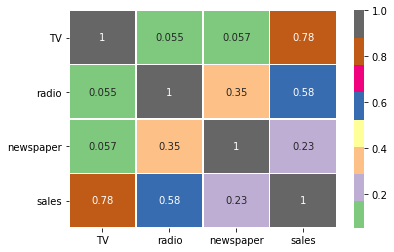

In [16]:
sns.heatmap(corr, cmap="Accent", annot=True, linewidth=0.3)

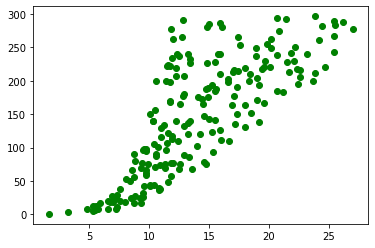

In [17]:
plt.scatter(x = 'sales', y = 'TV', data = df,c='g')

#### We can see here count around 25 TV  ads sales going upto count of 300

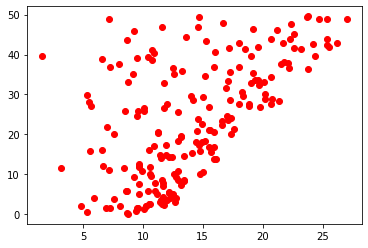

In [18]:
plt.scatter(x = 'sales', y = 'radio', data = df,c='r')

#### Here we notice with help of around 25 ads of radio sales going upto 50.

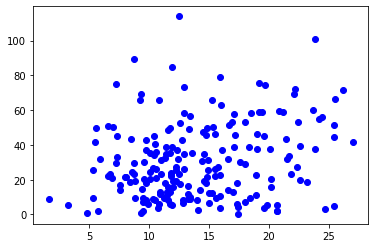

In [19]:
plt.scatter(x = 'sales', y = 'newspaper', data = df,c='b')

#### Here we notice around 25 ads of radio sales is spread up and down.

### Inference:

- Focussing on TV Advertisement more can get more sales.

## Outliers Validation

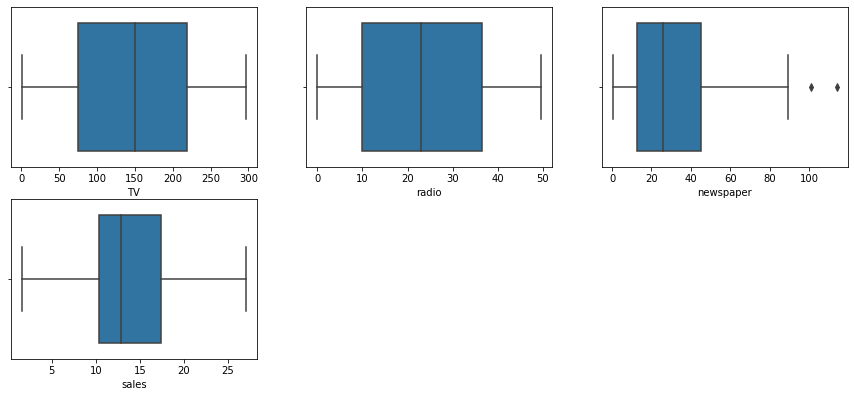

In [20]:
plt.figure(figsize=(15,10))
for o in enumerate(df):
    plt.subplot(3,3,o[0]+1)
    sns.boxplot(df[o[1]])

#### We can observe here we only having outliers in "newspaper" column

### Outliers removal

#### ZSCORE METHOD

In [21]:
#zscore

from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [22]:
z[16][2]

3.8411707150992718

In [23]:
z[101][2]

3.238153957342154

In [24]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (200, 4)
After removing outliers:: (198, 4)


#### IQR METHOD

In [25]:
#IQR
from scipy import stats 
IQR = stats.iqr(df) 
IQR 

38.525

In [26]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [27]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(174, 4)


#### We can notice using IQR method for outliers removal there is huge data loss so considering ZSCORE METHOD 

In [28]:
df=df_1

In [29]:
df.shape

(198, 4)

{'whiskers': [<matplotlib.lines.Line2D at 0xe64ec5e190>,
 'caps': [<matplotlib.lines.Line2D at 0xe64ec5e7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0xe64ef8fdc0>],
 'medians': [<matplotlib.lines.Line2D at 0xe64ec5eeb0>],
 'fliers': [<matplotlib.lines.Line2D at 0xe64ec69250>],
 'means': []}

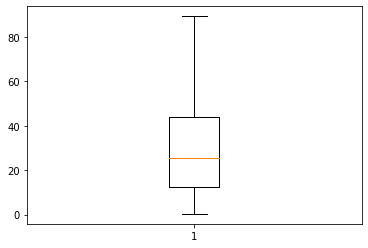

In [30]:
plt.boxplot(df['newspaper'])

We can see here the outliers are removed from newspaper column

## Skewness Validation

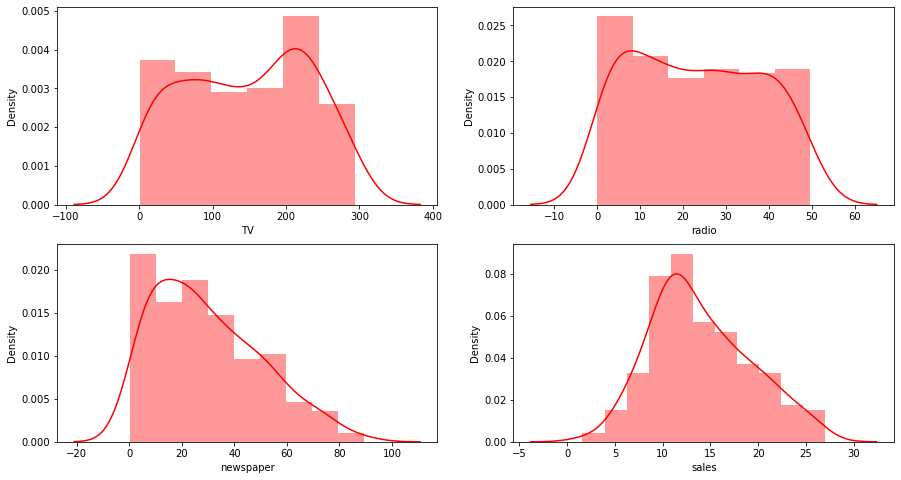

In [31]:
plt.figure(figsize=(15,8))
for i in enumerate(df):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(df[i[1]],color='r')    

In [32]:
df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

We can see here there is skewness in newspaper columns

In [ ]:
### Skewness removal

In [33]:
df['newspaper']=np.sqrt(df['newspaper'])

In [34]:
df.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.040649
sales        0.407130
dtype: float64

We can see here skewness has been removed from newspaper column

In [35]:
x=df.drop(['sales'],axis=1)
y=df['sales']


In [36]:
print(x.shape)
print(y.shape)

(198, 3)
(198,)


In [ ]:
#### DATA SCALING

In [37]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [38]:
pd.DataFrame(x).describe()

,0,1,2
count,198.000000,198.000000,198.000000
mean,0.498424,0.466347,0.509620
std,0.291715,0.299639,0.222222
min,0.000000,0.000000,0.000000
25%,0.252987,0.200101,0.337801
50%,0.508877,0.451613,0.506534
75%,0.743513,0.732359,0.683610
max,1.000000,1.000000,1.000000


In [39]:
x.shape

(198, 3)

 # BUILDING THE MODEL:

### Linear Regression

In [40]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



In [41]:
from sklearn.linear_model import LinearRegression


LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.8899808679263099
At random state 0, The test accuracy is: 0.9104353676454642


At random state 1, The training accuracy is: 0.8945018460466634
At random state 1, The test accuracy is: 0.8915808201402337


At random state 2, The training accuracy is: 0.9104895320853252
At random state 2, The test accuracy is: 0.8385093780102322


At random state 3, The training accuracy is: 0.8945008732306111
At random state 3, The test accuracy is: 0.8977495614063602


At random state 4, The training accuracy is: 0.8980063011610756
At random state 4, The test accuracy is: 0.8726744168845625


At random state 5, The training accuracy is: 0.8993019881675023
At random state 5, The test accuracy is: 0.8622409600064913


At random state 6, The training accuracy is: 0.8991574664390982
At random state 6, The test accuracy is: 0.8766949131606818


At random state 7, The training accuracy is: 0.890944609101688
At random state 7, The test accuracy is: 0.906380726342

At random state 77, The training accuracy is: 0.8889513987941758
At random state 77, The test accuracy is: 0.9168452679704558


At random state 78, The training accuracy is: 0.9135381248514395
At random state 78, The test accuracy is: 0.7899873713177684


At random state 79, The training accuracy is: 0.8920179616099255
At random state 79, The test accuracy is: 0.9004279725235953


At random state 80, The training accuracy is: 0.892726634902634
At random state 80, The test accuracy is: 0.9035040850720205


At random state 81, The training accuracy is: 0.8877972939748031
At random state 81, The test accuracy is: 0.9199819618982278


At random state 82, The training accuracy is: 0.9088225935331654
At random state 82, The test accuracy is: 0.840722645720096


At random state 83, The training accuracy is: 0.9004411052929164
At random state 83, The test accuracy is: 0.8790442238369578


At random state 84, The training accuracy is: 0.8837031763075623
At random state 84, The test accuracy is:

random state=10 giving highest accuracy.

#### SPLITTING THE DATA WITH RANDOM STATE =10

In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [91]:
dr=DecisionTreeRegressor()
svr=SVR() 
rf=RandomForestRegressor()

In [93]:
model=[LR,dr,svr,rf]

In [94]:
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=13)
    m.fit(x_train,y_train)
    predl=m.predict(x_test)
    print('r2_score of',m,'is:')
    print(r2_score(y_test,predl))
    print('mean_squared_error:',mean_squared_error(y_test,predl))
    print('mean_absolute_error:',mean_absolute_error(y_test,predl))
    print('root_mean_squared_error',np.sqrt(mean_squared_error(y_test,predl)))
    print('\n')

r2_score of LinearRegression() is:
0.8715401304923547
mean_squared_error: 3.1040739559802204
mean_absolute_error: 1.2986366986239262
root_mean_squared_error 1.761838232069057


r2_score of DecisionTreeRegressor() is:
0.9498491485471531
mean_squared_error: 1.2118333333333335
mean_absolute_error: 0.795
root_mean_squared_error 1.1008330179156753


r2_score of SVR() is:
0.9333728730672562
mean_squared_error: 1.6099621637978494
mean_absolute_error: 0.6697483863853935
root_mean_squared_error 1.2688428444050308


r2_score of RandomForestRegressor() is:
0.9719976068389824
mean_squared_error: 0.6766432166666659
mean_absolute_error: 0.5956833333333333
root_mean_squared_error 0.8225832581974094




Cross Val Score

In [95]:

from sklearn.model_selection import cross_val_score

In [97]:
lrs=cross_val_score(LR,x,y,scoring='r2',cv=5)
print('LinearRegression cross_val_score:',lrs.mean())

LinearRegression cross_val_score: 0.8857406146589943


In [98]:
drs=cross_val_score(dr,x,y,scoring='r2',cv=5) 
print('DecisionTreeRegressor cross_val_score:',drs.mean())

DecisionTreeRegressor cross_val_score: 0.9553159800519262


In [99]:
svs=cross_val_score(svr,x,y,scoring='r2',cv=5)
print('SVR cross_val_score:',svs.mean())

SVR cross_val_score: 0.9140567254033132


In [100]:
rfr=cross_val_score(rf,x,y,scoring='r2',cv=5)     
print('RandomforestRegressor cross_val_score:',rfr.mean())

RandomforestRegressor cross_val_score: 0.9751149852819327


We can see that RandomforestRegressor is performing well with 97% by doing cross-validation. We will check the best estimator. We can use Hyper Parameter Tuning.

Hyper Parameter Tuning.

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
grid_param={'criterion':['mse','mae']}
gd=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='r2',cv=5)
gd.fit(x,y)
best_parameter=gd.best_params_
print('best_parameter:',best_parameter)

best_parameter: {'criterion': 'mae'}


In [103]:
gd_pred=gd.best_estimator_.predict(x_test)

In [104]:
gd_pred

array([12.135 , 15.182 ,  9.685 , 18.326 , 16.032 , 24.967 , 10.408 ,
       15.902 , 12.221 , 17.181 , 17.936 ,  7.311 , 19.81  , 12.998 ,
        9.567 , 19.644 , 12.827 , 12.076 , 14.851 , 22.2615, 11.89  ,
        3.272 , 18.807 , 13.085 , 16.954 ,  9.474 , 11.972 , 12.319 ,
       12.695 , 12.391 , 20.408 ,  8.932 , 13.122 ,  9.861 , 11.681 ,
       22.4905,  8.994 , 10.232 ,  7.318 , 18.874 ,  8.876 ,  8.87  ,
       21.9615, 11.402 , 10.462 ,  8.899 , 22.2125, 10.757 , 14.87  ,
       13.145 , 16.912 , 18.356 , 11.183 , 14.318 , 11.217 , 21.7115,
       15.131 , 10.898 , 22.5015, 23.2105])

In [105]:
r2_score(y_test,gd_pred)

0.9961940933709854

Now we can see that after doing hyperparameter tunning the r2_score is 99% . This is our best model.

## saving the model

In [106]:

import joblib

In [108]:
joblib.dump(gd.best_estimator_,'Advertising Sales Channel Prediction_Project.pkl')

['Advertising Sales Channel Prediction_Project.pkl']